In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data1 = pd.read_csv('purchase_data.csv')  # Change this to your file path
data2 = pd.read_csv('promotion_data.csv')  # Change this to your file path
data = pd.merge(data1, data2, left_index=True, right_index=True, how='inner')

print(data.head())

   customer_id_x  purchase_price  num_items            timestamp day_of_week  \
0            181           62.17         10  2023-01-01 10:29:00      Sunday   
1             20            6.63         10  2023-01-02 13:46:00      Monday   
2             62           76.99          1  2023-01-02 18:59:00      Monday   
3             12           89.32          1  2023-01-03 07:15:00     Tuesday   
4             44           11.84          3  2023-01-03 19:49:00     Tuesday   

   hour_of_day  is_weekend  customer_id_y  promotion_timestamp  clicked  
0           10           1            181  2023-01-14 03:29:00        0  
1           13           0             20  2023-01-08 14:46:00        0  
2           18           0             62  2023-01-19 21:59:00        1  
3            7           0             12  2023-01-03 22:15:00        1  
4           19           0             44  2023-01-22 22:49:00        0  


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id_x        1000 non-null   int64  
 1   purchase_price       1000 non-null   float64
 2   num_items            1000 non-null   int64  
 3   timestamp            1000 non-null   object 
 4   day_of_week          1000 non-null   object 
 5   hour_of_day          1000 non-null   int64  
 6   is_weekend           1000 non-null   int64  
 7   customer_id_y        1000 non-null   int64  
 8   promotion_timestamp  1000 non-null   object 
 9   clicked              1000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB
None


In [4]:
print(data.isnull().sum())


customer_id_x          0
purchase_price         0
num_items              0
timestamp              0
day_of_week            0
hour_of_day            0
is_weekend             0
customer_id_y          0
promotion_timestamp    0
clicked                0
dtype: int64


In [5]:
data.head()

,customer_id_x,purchase_price,num_items,timestamp,day_of_week,hour_of_day,is_weekend,customer_id_y,promotion_timestamp,clicked
0,181,62.17,10,2023-01-01 10:29:00,Sunday,10,1,181,2023-01-14 03:29:00,0
1,20,6.63,10,2023-01-02 13:46:00,Monday,13,0,20,2023-01-08 14:46:00,0
2,62,76.99,1,2023-01-02 18:59:00,Monday,18,0,62,2023-01-19 21:59:00,1
3,12,89.32,1,2023-01-03 07:15:00,Tuesday,7,0,12,2023-01-03 22:15:00,1
4,44,11.84,3,2023-01-03 19:49:00,Tuesday,19,0,44,2023-01-22 22:49:00,0


In [6]:
# Convert time column to datetime (assuming column name is 'timestamp')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['promotion_timestamp'] = pd.to_datetime(data['promotion_timestamp'])
data['month'] = data['timestamp'].dt.month
data['day_of_week'] = data['timestamp'].dt.weekday
data['promotion_month'] = data['promotion_timestamp'].dt.month
data['promotion_day_of_week'] = data['promotion_timestamp'].dt.weekday

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id_x          1000 non-null   int64         
 1   purchase_price         1000 non-null   float64       
 2   num_items              1000 non-null   int64         
 3   timestamp              1000 non-null   datetime64[ns]
 4   day_of_week            1000 non-null   int32         
 5   hour_of_day            1000 non-null   int64         
 6   is_weekend             1000 non-null   int64         
 7   customer_id_y          1000 non-null   int64         
 8   promotion_timestamp    1000 non-null   datetime64[ns]
 9   clicked                1000 non-null   int64         
 10  month                  1000 non-null   int32         
 11  promotion_month        1000 non-null   int32         
 12  promotion_day_of_week  1000 non-null   int32         
dtypes: d

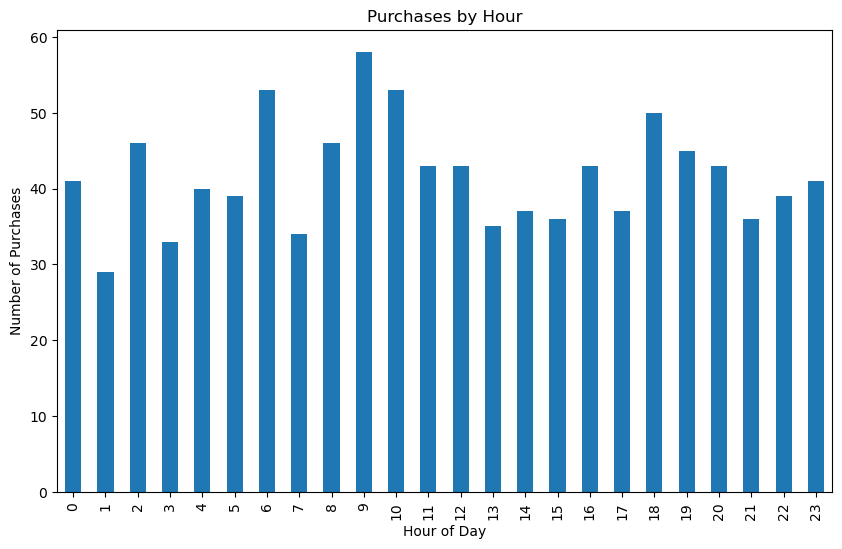

In [8]:
# Plot purchases by hour of the day
purchase_by_hour = data.groupby('hour_of_day').size()

plt.figure(figsize=(10, 6))
purchase_by_hour.plot(kind='bar')
plt.title('Purchases by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.show()


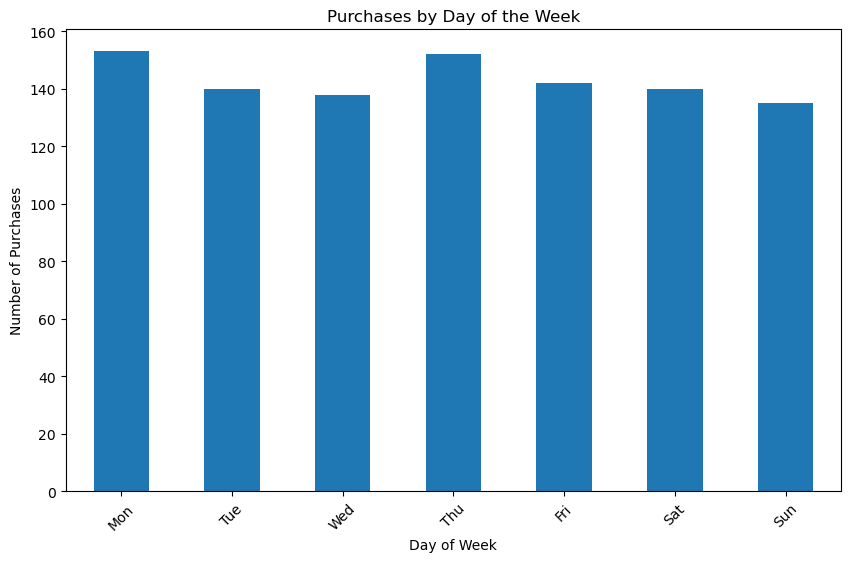

In [9]:
# Plot purchases by day of the week
purchase_by_day = data.groupby('day_of_week').size()

plt.figure(figsize=(10, 6))
purchase_by_day.plot(kind='bar')
plt.title('Purchases by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Purchases')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()


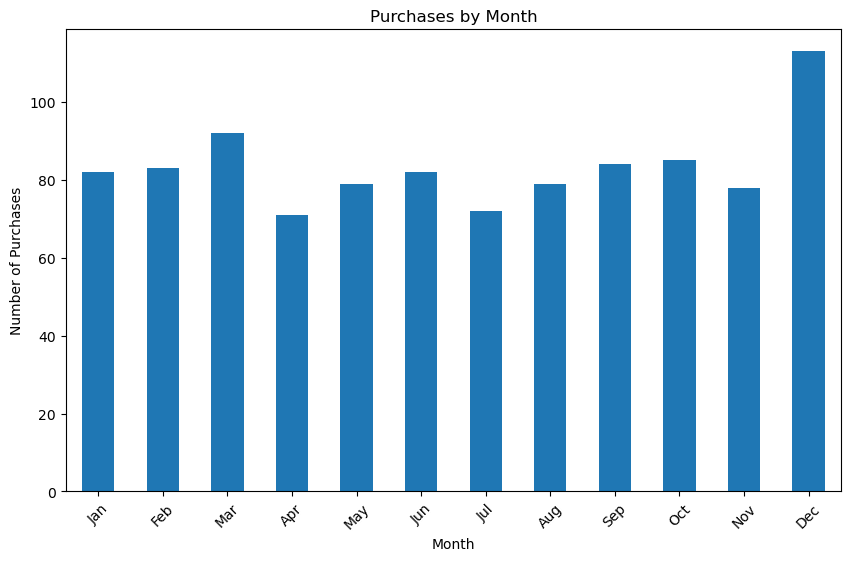

In [10]:
# Plot purchases by month
purchase_by_month = data.groupby('month').size()

plt.figure(figsize=(10, 6))
purchase_by_month.plot(kind='bar')
plt.title('Purchases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


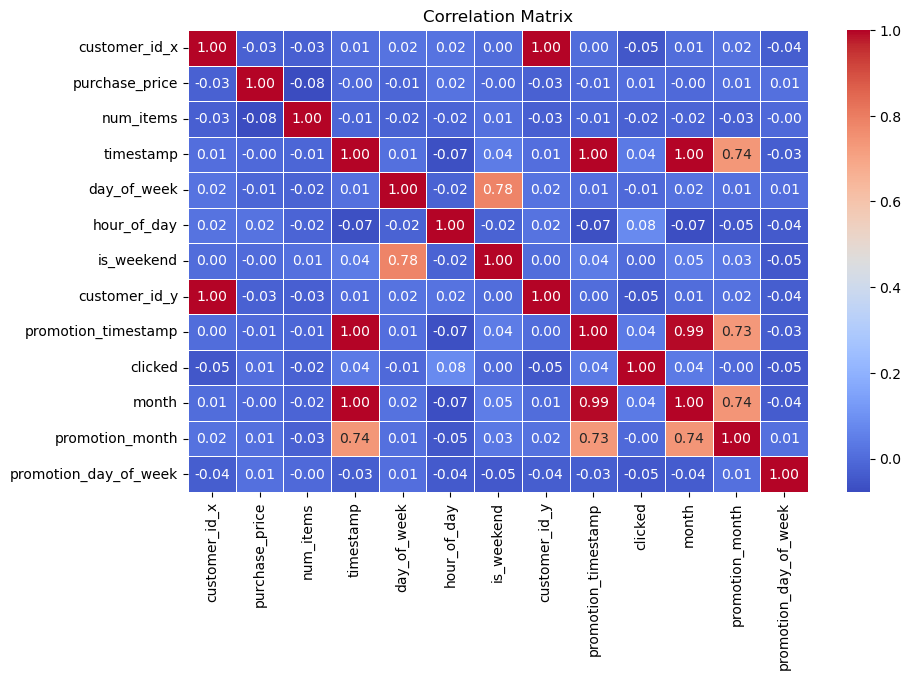

In [11]:
# Plot correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


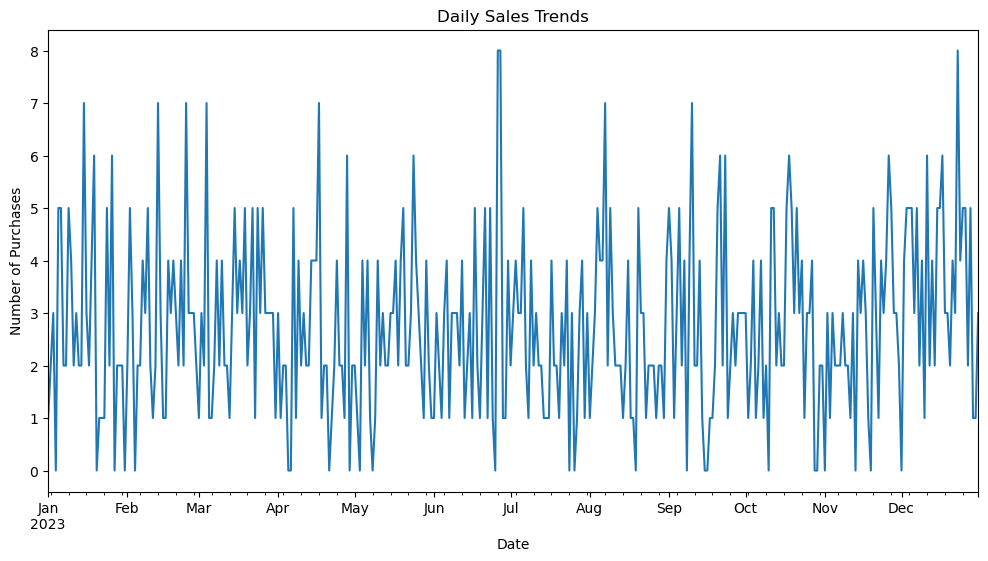

In [12]:
# Aggregate data by time (e.g., daily sales count)
daily_sales = data.resample('D', on='timestamp').size()

plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.show()


# Feature Engieerning


In [14]:
# Calculate time difference base on hours
data['promotion_diff_hours'] = (data['timestamp'] - data['promotion_timestamp']).dt.total_seconds() / 3600

# check the new feature
print(data[['promotion_timestamp', 'timestamp', 'promotion_diff_hours']].head())


  promotion_timestamp           timestamp  promotion_diff_hours
0 2023-01-14 03:29:00 2023-01-01 10:29:00                -305.0
1 2023-01-08 14:46:00 2023-01-02 13:46:00                -145.0
2 2023-01-19 21:59:00 2023-01-02 18:59:00                -411.0
3 2023-01-03 22:15:00 2023-01-03 07:15:00                 -15.0
4 2023-01-22 22:49:00 2023-01-03 19:49:00                -459.0


In [15]:
# take timestamp relatated feature
data['purchase_year'] = data['timestamp'].dt.year
data['purchase_month'] = data['timestamp'].dt.month
data['purchase_day'] = data['timestamp'].dt.day
data['purchase_hour'] = data['timestamp'].dt.hour
data['purchase_minute'] = data['timestamp'].dt.minute

# analysis is weenkend 
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# analysis is work day 
data['is_workday'] = 1 - data['is_weekend']

# take quarter
data['purchase_quarter'] = data['timestamp'].dt.quarter


In [16]:
# is peak hour or not
def is_peak_hour(hour):
    if 8 <= hour < 11 or 17 <= hour < 20:
        return 1
    return 0

data['is_peak_hour'] = data['purchase_hour'].apply(is_peak_hour)


In [17]:
# total amount
data['purchase_amount'] = data['purchase_price'] * data['num_items']

# split in range
bins = [0, 20, 50, 100, 200, 500, np.inf]
labels = ['0-20', '20-50', '50-100', '100-200', '200-500', '500+']
data['purchase_amount_range'] = pd.cut(data['purchase_amount'], bins=bins, labels=labels)



In [18]:
# customer purchase count
data['customer_purchase_count'] = data.groupby('customer_id_x')['purchase_amount'].transform('count')

# customer purchase total amount
data['customer_total_purchase'] = data.groupby('customer_id_x')['purchase_amount'].transform('sum')

# customer purchase average amount
data['customer_avg_purchase'] = data.groupby('customer_id_x')['purchase_amount'].transform('mean')


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id_x            1000 non-null   int64         
 1   purchase_price           1000 non-null   float64       
 2   num_items                1000 non-null   int64         
 3   timestamp                1000 non-null   datetime64[ns]
 4   day_of_week              1000 non-null   int32         
 5   hour_of_day              1000 non-null   int64         
 6   is_weekend               1000 non-null   int64         
 7   customer_id_y            1000 non-null   int64         
 8   promotion_timestamp      1000 non-null   datetime64[ns]
 9   clicked                  1000 non-null   int64         
 10  month                    1000 non-null   int32         
 11  promotion_month          1000 non-null   int32         
 12  promotion_day_of_week    1000 non-n

In [20]:
data.drop(['timestamp', 'promotion_timestamp', 'customer_id_y','customer_id_x'], axis=1, inplace=True)


In [21]:
data = pd.get_dummies(data, columns=['purchase_amount_range'], drop_first=True)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   purchase_price                 1000 non-null   float64
 1   num_items                      1000 non-null   int64  
 2   day_of_week                    1000 non-null   int32  
 3   hour_of_day                    1000 non-null   int64  
 4   is_weekend                     1000 non-null   int64  
 5   clicked                        1000 non-null   int64  
 6   month                          1000 non-null   int32  
 7   promotion_month                1000 non-null   int32  
 8   promotion_day_of_week          1000 non-null   int32  
 9   promotion_diff_hours           1000 non-null   float64
 10  purchase_year                  1000 non-null   int32  
 11  purchase_month                 1000 non-null   int32  
 12  purchase_day                   1000 non-null   in

In [23]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numeric_features = ['promotion_diff_hours', 'purchase_amount', 'customer_purchase_count', 'customer_total_purchase', 'customer_avg_purchase']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


In [24]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(['clicked'], axis=1)  # Exclude the target column
y = data['clicked']  # Target column

# Split into training and test sets

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


** Logistic

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr_model = LogisticRegression(random_state=42, max_iter=500)
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.63      0.55        99
           1       0.51      0.38      0.43       101

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.50      0.49       200

Confusion Matrix:
 [[62 37]
 [63 38]]


/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Feature Ranking (Logistic Regression):
                          Feature    Importance
16                   is_peak_hour  2.266133e-01
24  purchase_amount_range_200-500  2.098512e-01
17                purchase_amount  1.646962e-01
21    purchase_amount_range_20-50  9.444621e-02
25     purchase_amount_range_500+  8.143986e-02
8            promotion_diff_hours  8.139715e-02
23  purchase_amount_range_100-200  6.998088e-02
1                       num_items  6.378622e-02
22   purchase_amount_range_50-100  6.091586e-02
6                 promotion_month  5.610368e-02
19        customer_total_purchase  5.139460e-02
7           promotion_day_of_week  4.264636e-02
5                           month  3.185040e-02
10                 purchase_month  3.185040e-02
15               purchase_quarter  2.692973e-02
18        customer_purchase_count  2.434457e-02
2                     day_of_week  1.960046e-02
12                  purchase_hour  1.266495e-02
3                     hour_of_day  1.266495e-02

/var/folders/k3/7d8xvp51451d_3lkv9yq12g80000gn/T/ipykernel_92375/2789412116.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="coolwarm")


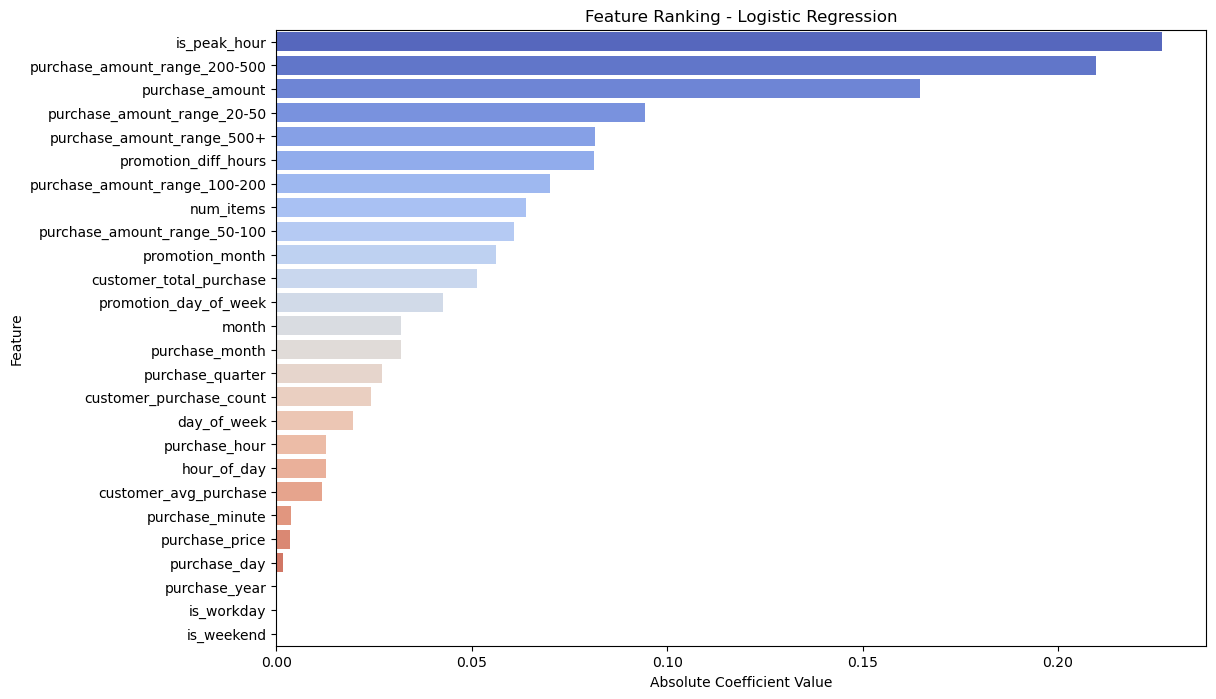

In [27]:
# Feature Importance (Absolute Coefficients)
feature_importance = np.abs(lr_model.coef_[0])  # Taking absolute values
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\n Feature Ranking (Logistic Regression):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="coolwarm")
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Ranking - Logistic Regression')
plt.show()

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.505
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.57      0.53        99
           1       0.51      0.45      0.48       101

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

Confusion Matrix:
 [[56 43]
 [56 45]]

 Feature Ranking (Logistic Regression):


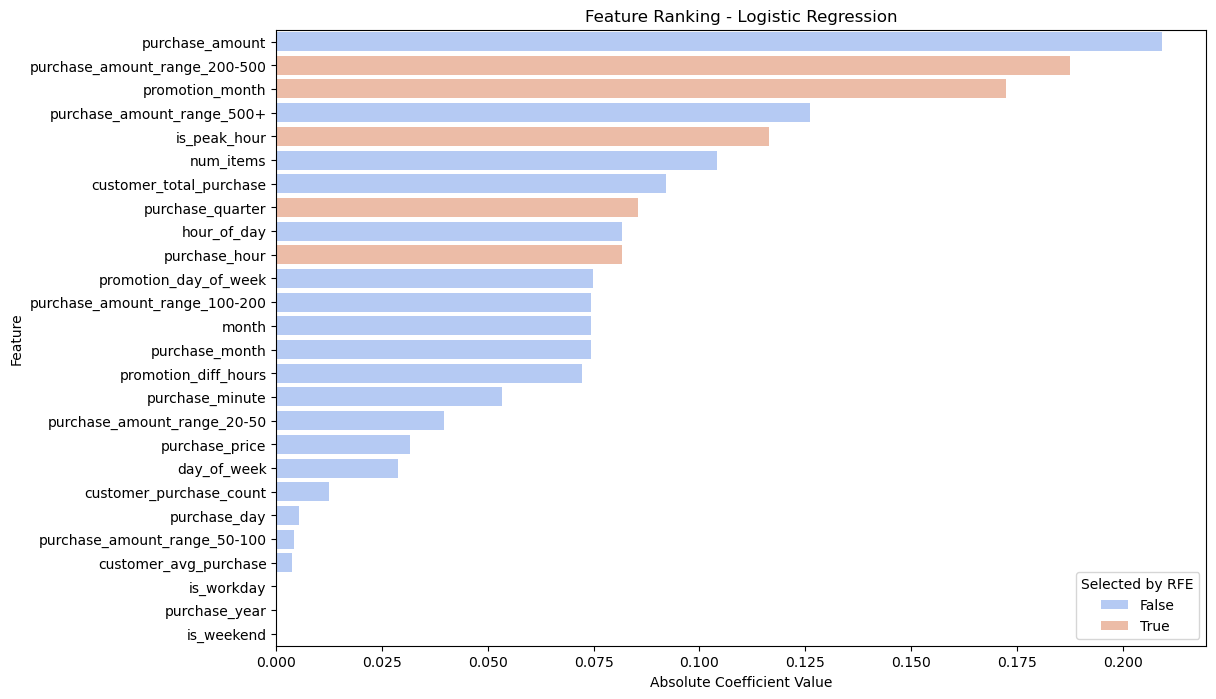

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE  # Handle class imbalance

# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Handle Class Imbalance (if necessary)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=500), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_

# Train the model with optimized parameters
lr_model = LogisticRegression(random_state=42, max_iter=500, C=grid_search.best_params_['C'], solver=grid_search.best_params_['solver'])
lr_model.fit(x_train_resampled, y_train_resampled)

# Predictions
y_pred = lr_model.predict(x_val_scaled)

# Performance Metrics
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Feature Selection using Recursive Feature Elimination (RFE)
rfe = RFE(lr_model, n_features_to_select=5)  # Select top 5 features
rfe.fit(x_train_resampled, y_train_resampled)

# Feature Importance
feature_importance = np.abs(lr_model.coef_[0])  # Taking absolute values
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance,
    'Selected': rfe.support_  # Indicating selected features by RFE
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\n Feature Ranking (Logistic Regression):")

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], hue=importance_df['Selected'], palette="coolwarm")
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Ranking - Logistic Regression')
plt.legend(title='Selected by RFE')
plt.show()


In [29]:
from sklearn.ensemble import RandomForestClassifier

# train random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# prediction
y_pred_rf = rf_model.predict(x_val)

# modeling
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))


Accuracy: 0.51
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.68      0.58        99
           1       0.52      0.35      0.42       101

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

Confusion Matrix:
 [[67 32]
 [66 35]]



Feature Importances (Logistic Regression):


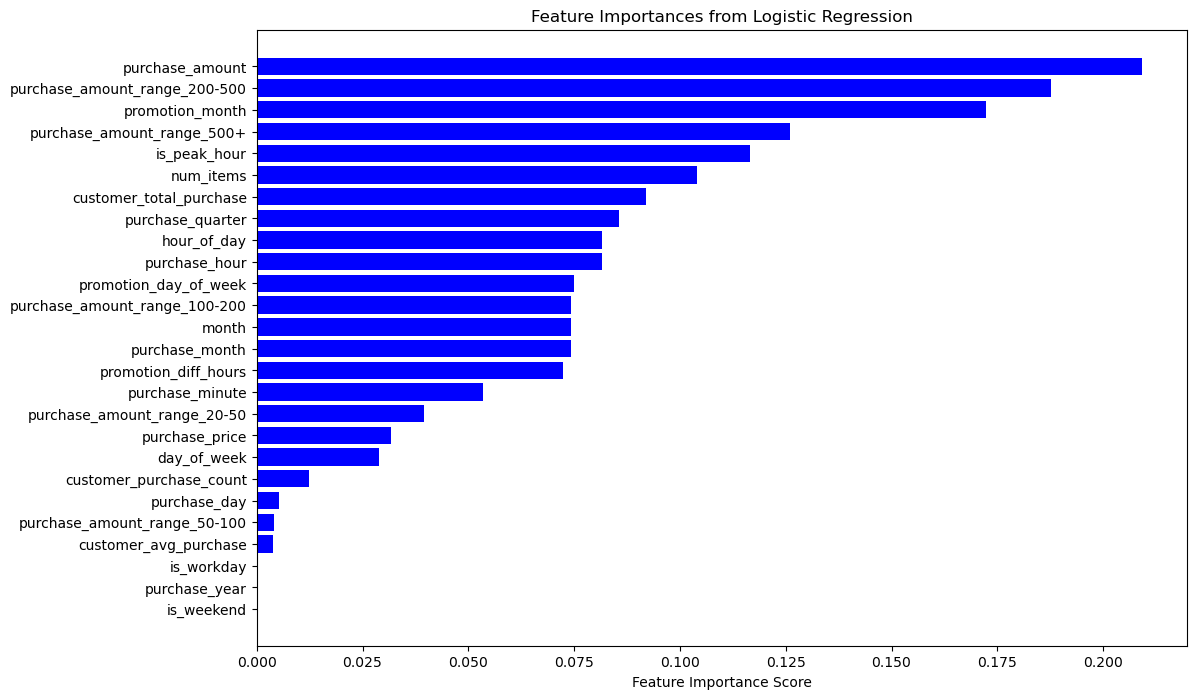

In [30]:
# Extract Feature Importance (Absolute Coefficients)
feature_importances = np.abs(lr_model.coef_[0])
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (Logistic Regression):")

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.gca().invert_yaxis()  
plt.xlabel('Feature Importance Score')
plt.title('Feature Importances from Logistic Regression')
plt.show()


 Best RF Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}

 Random Forest Accuracy: 0.51

 Classification Report (RF):
               precision    recall  f1-score   support

           0       0.50      0.60      0.55        99
           1       0.52      0.43      0.47       101

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200


 Confusion Matrix (RF):
 [[59 40]
 [58 43]]

 Feature Importance Comparison (RF vs LR):


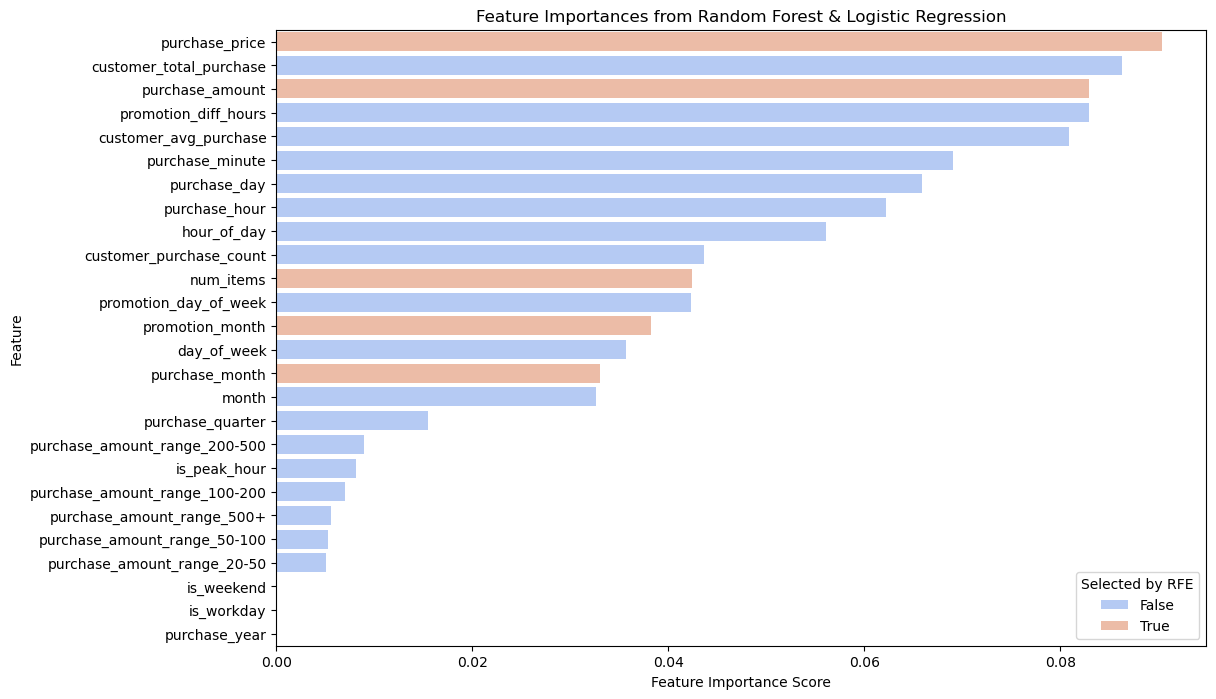

In [31]:
# Standardize Features for Logistic Regression
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Handle Class Imbalance
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 150, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train_resampled, y_train_resampled)

best_rf = grid_search_rf.best_estimator_

#  Train Optimized Random Forest Model
rf_model = RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'],
                                  max_depth=grid_search_rf.best_params_['max_depth'],
                                  min_samples_split=grid_search_rf.best_params_['min_samples_split'],
                                  random_state=42)
rf_model.fit(x_train_resampled, y_train_resampled)

# Predict with Random Forest
y_pred_rf = rf_model.predict(x_val_scaled)

# Evaluate Performance
print(" Best RF Parameters:", grid_search_rf.best_params_)
print("\n Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("\n Classification Report (RF):\n", classification_report(y_val, y_pred_rf))
print("\n Confusion Matrix (RF):\n", confusion_matrix(y_val, y_pred_rf))

# Feature Selection using RFE for Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=500)
rfe = RFE(lr_model, n_features_to_select=5)  # Select top 5 features
rfe.fit(x_train_resampled, y_train_resampled)

# Train Logistic Regression
lr_model.fit(x_train_resampled, y_train_resampled)
y_pred_lr = lr_model.predict(x_val_scaled)

# Extract Feature Importances for Random Forest
rf_importances = rf_model.feature_importances_
lr_importances = np.abs(lr_model.coef_[0])

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'RandomForest_Importance': rf_importances,
    'LogisticRegression_Importance': lr_importances,
    'Selected_by_RFE': rfe.support_  # Indicating features selected by RFE
}).sort_values(by='RandomForest_Importance', ascending=False)

#  Print Feature Importance Comparison
print("\n Feature Importance Comparison (RF vs LR):")
#  Visualization: Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_df['RandomForest_Importance'], y=importance_df['Feature'], hue=importance_df['Selected_by_RFE'], palette="coolwarm")
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest & Logistic Regression')
plt.legend(title='Selected by RFE')
plt.show()


In [32]:
from xgboost import XGBClassifier

#  XGBoost 
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

# prediction
y_pred_xgb = xgb_model.predict(x_val)

# modeling
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Classification Report:\n", classification_report(y_val, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_xgb))

Accuracy: 0.545
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.61      0.57        99
           1       0.56      0.49      0.52       101

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.55      0.55      0.54       200

Confusion Matrix:
 [[60 39]
 [52 49]]


/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:49:53] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Feature Importances (XGBoost Classifier):
                          Feature  Importance
23  purchase_amount_range_100-200    0.086530
18        customer_purchase_count    0.061139
3                     hour_of_day    0.059127
21    purchase_amount_range_20-50    0.057686
19        customer_total_purchase    0.056646
7           promotion_day_of_week    0.056263
0                  purchase_price    0.055789
20          customer_avg_purchase    0.054915
5                           month    0.053351
17                purchase_amount    0.051466
16                   is_peak_hour    0.048661
24  purchase_amount_range_200-500    0.048131
22   purchase_amount_range_50-100    0.048100
13                purchase_minute    0.047259
11                   purchase_day    0.045217
6                 promotion_month    0.044455
8            promotion_diff_hours    0.044041
2                     day_of_week    0.042668
1                       num_items    0.038558
14                     is_workday    

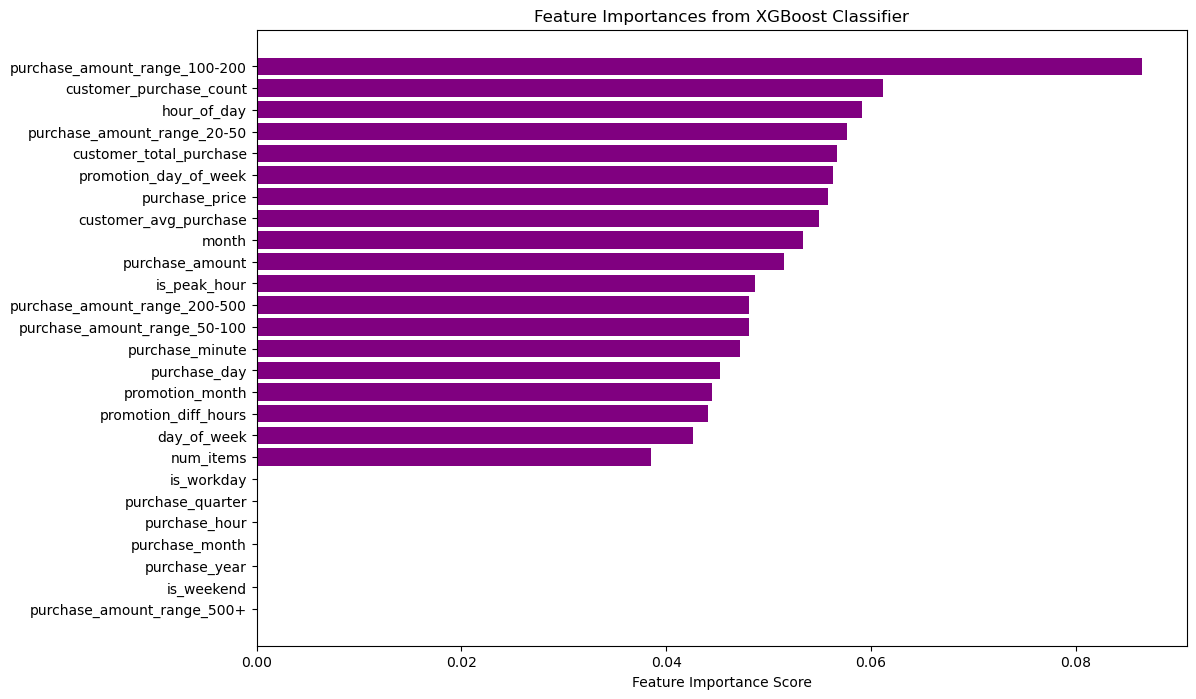

In [33]:

# Extract Feature Importances
feature_importances = xgb_model.feature_importances_
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (XGBoost Classifier):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')
plt.gca().invert_yaxis()  
plt.xlabel('Feature Importance Score')
plt.title('Feature Importances from XGBoost Classifier')
plt.show()

In [34]:
from sklearn.svm import SVC

# SVm
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(x_train, y_train)

# prediction
y_pred_svm = svm_model.predict(x_val)

# modeling
print("Accuracy:", accuracy_score(y_val, y_pred_svm))
print("Classification Report:\n", classification_report(y_val, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))


Accuracy: 0.495
Classification Report:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66        99
           1       0.00      0.00      0.00       101

    accuracy                           0.49       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.49      0.33       200

Confusion Matrix:
 [[ 99   0]
 [101   0]]


/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Hyperparameter Tuning with GridSearchC
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid_search_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(x_train_scaled, y_train)

best_svm = SVC(
    C=grid_search_svm.best_params_['C'],
    gamma=grid_search_svm.best_params_['gamma'],
    kernel=grid_search_svm.best_params_['kernel'],
    probability=True,
    random_state=42
)

# Train SVM Model with Optimized Parameters
best_svm.fit(x_train_scaled, y_train)

# Cross Valiation
cv_scores = cross_val_score(best_svm, x_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nAccuracy of CV:", cv_scores.mean())

# predictions
y_pred_svm = best_svm.predict(x_val_scaled)

# evaluation
print("\nSVM accurcy:", accuracy_score(y_val, y_pred_svm))
print("\nclassification report (SVM):\n", classification_report(y_val, y_pred_svm))
print("\nconfusion matrix (SVM):\n", confusion_matrix(y_val, y_pred_svm))

# Feature Importance
if grid_search_svm.best_params_['kernel'] == 'linear':
    feature_importance = np.abs(best_svm.coef_).flatten()
    features = x_train.columns

    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="coolwarm")
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importances from SVM (Linear Kernel)')
    plt.show()



Accuracy of CV: 0.5587500000000001

SVM accurcy: 0.54

classification report (SVM):
               precision    recall  f1-score   support

           0       0.53      0.70      0.60        99
           1       0.57      0.39      0.46       101

    accuracy                           0.54       200
   macro avg       0.55      0.54      0.53       200
weighted avg       0.55      0.54      0.53       200


confusion matrix (SVM):
 [[69 30]
 [62 39]]


In [36]:
from sklearn.neighbors import KNeighborsClassifier

#  KNN 
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# prediction
y_pred_knn = knn_model.predict(x_val)

# modeling
print("Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Classification Report:\n", classification_report(y_val, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))


Accuracy: 0.555
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.64      0.59        99
           1       0.57      0.48      0.52       101

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.56      0.56      0.55       200

Confusion Matrix:
 [[63 36]
 [53 48]]



Feature Importances (KNN - Permutation Importance):
                          Feature  Importance
12                  purchase_hour      0.0670
3                     hour_of_day      0.0670
11                   purchase_day      0.0435
0                  purchase_price      0.0430
10                 purchase_month      0.0395
5                           month      0.0395
13                purchase_minute      0.0270
1                       num_items      0.0245
6                 promotion_month      0.0195
7           promotion_day_of_week      0.0120
17                purchase_amount      0.0040
2                     day_of_week      0.0030
15               purchase_quarter      0.0015
8            promotion_diff_hours      0.0005
20          customer_avg_purchase      0.0000
24  purchase_amount_range_200-500      0.0000
23  purchase_amount_range_100-200      0.0000
22   purchase_amount_range_50-100      0.0000
21    purchase_amount_range_20-50      0.0000
16                   is_pea

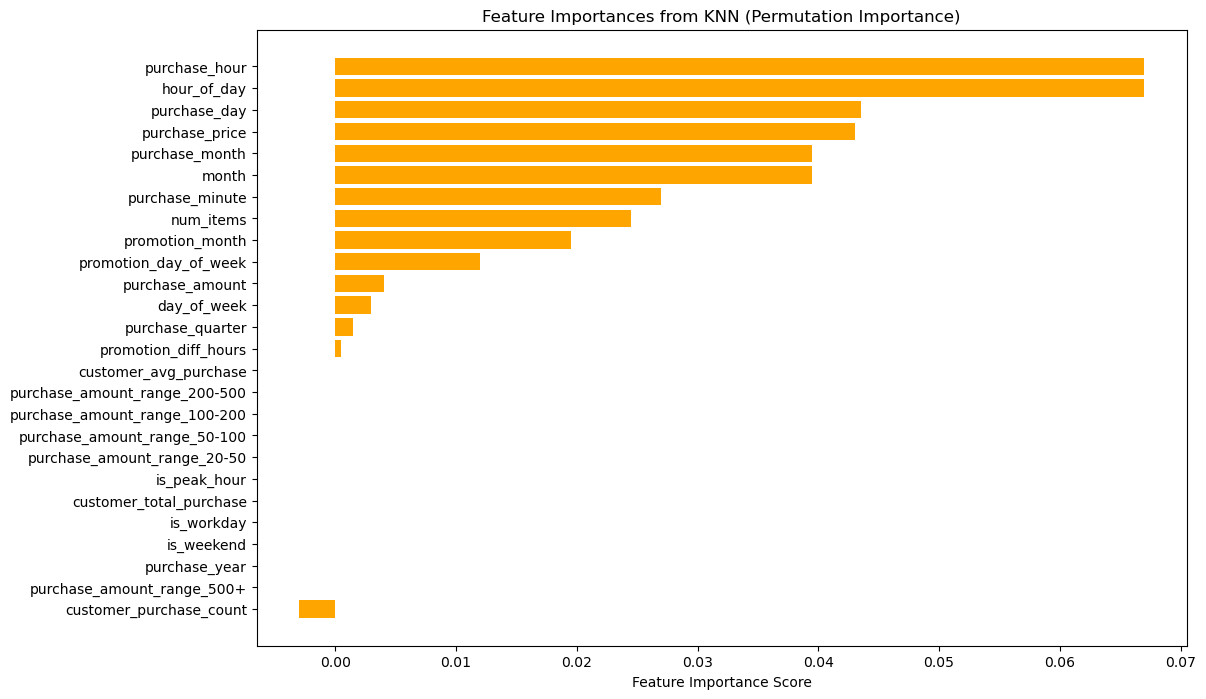

In [37]:
# Compute Feature Importance using Permutation Importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(knn_model, x_val, y_val, scoring='accuracy', n_repeats=10, random_state=42)
feature_importances = perm_importance.importances_mean
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (KNN - Permutation Importance):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.gca().invert_yaxis()  
plt.xlabel('Feature Importance Score')
plt.title('Feature Importances from KNN (Permutation Importance)')
plt.show()


 KNN Accuracy: 0.54

 Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.53      0.73      0.61        99
           1       0.57      0.36      0.44       101

    accuracy                           0.54       200
   macro avg       0.55      0.54      0.52       200
weighted avg       0.55      0.54      0.52       200


 Confusion Matrix (KNN):
 [[72 27]
 [65 36]]


/var/folders/k3/7d8xvp51451d_3lkv9yq12g80000gn/T/ipykernel_92375/3922289043.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="coolwarm")


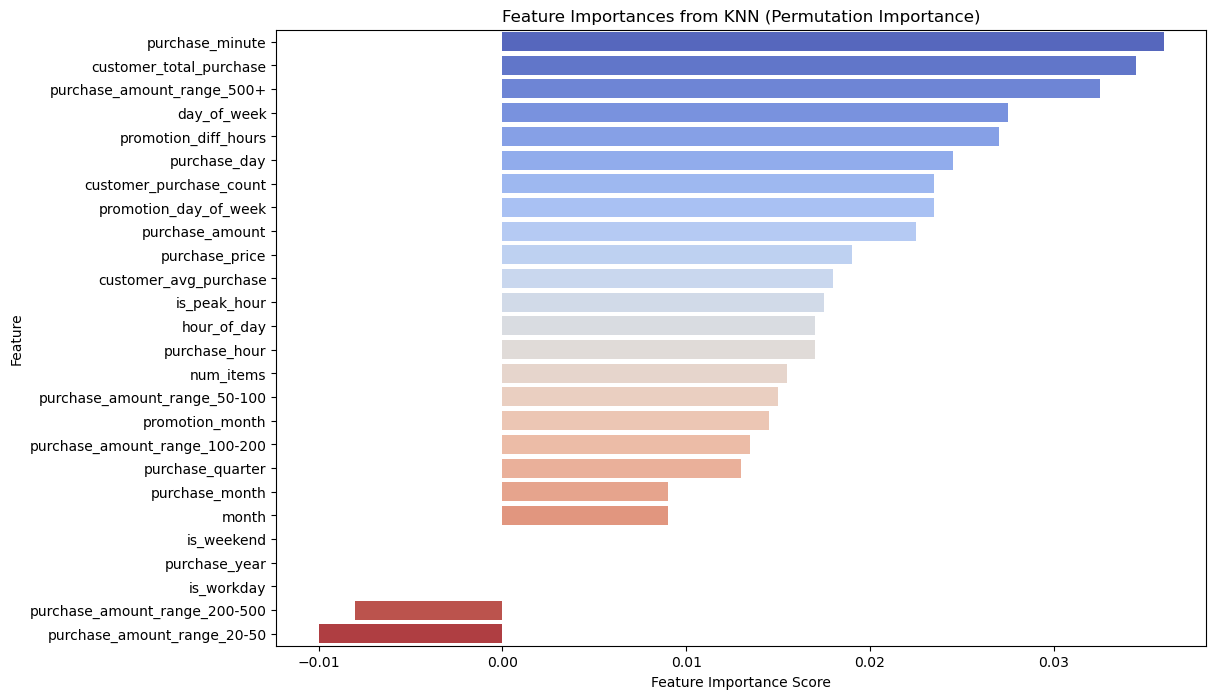

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize data (Feature Scaling)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

#  Use GridSearchCV to find the best k value
param_grid = {'n_neighbors': range(1, 21)}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train_scaled, y_train)

#  Train the best KNN model
best_knn = KNeighborsClassifier(n_neighbors=grid_search_knn.best_params_['n_neighbors'])
best_knn.fit(x_train_scaled, y_train)

#  Compute feature importance using Permutation Importance
perm_importance = permutation_importance(best_knn, x_val_scaled, y_val, scoring='accuracy', n_repeats=10, random_state=42)
feature_importances = perm_importance.importances_mean
features = x_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

#  Make predictions
y_pred_knn = best_knn.predict(x_val_scaled)

#  Evaluate the model
print("\n KNN Accuracy:", accuracy_score(y_val, y_pred_knn))
print("\n Classification Report (KNN):\n", classification_report(y_val, y_pred_knn))
print("\n Confusion Matrix (KNN):\n", confusion_matrix(y_val, y_pred_knn))

#  Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="coolwarm")
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances from KNN (Permutation Importance)')
plt.show()


In [39]:
from sklearn.neural_network import MLPClassifier

# MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(x_train, y_train)

# preidction
y_pred_mlp = mlp_model.predict(x_val)

# modeling
print("Accuracy:", accuracy_score(y_val, y_pred_mlp))
print("Classification Report:\n", classification_report(y_val, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_mlp))


Accuracy: 0.51
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.86      0.63        99
           1       0.55      0.17      0.26       101

    accuracy                           0.51       200
   macro avg       0.53      0.51      0.45       200
weighted avg       0.53      0.51      0.44       200

Confusion Matrix:
 [[85 14]
 [84 17]]



Feature Importances (MLP - Permutation Importance):
                          Feature  Importance
3                     hour_of_day      0.0315
0                  purchase_price      0.0235
19        customer_total_purchase      0.0230
7           promotion_day_of_week      0.0190
25     purchase_amount_range_500+      0.0140
2                     day_of_week      0.0135
12                  purchase_hour      0.0135
8            promotion_diff_hours      0.0135
22   purchase_amount_range_50-100      0.0120
24  purchase_amount_range_200-500      0.0115
13                purchase_minute      0.0105
21    purchase_amount_range_20-50      0.0055
1                       num_items      0.0055
6                 promotion_month      0.0055
16                   is_peak_hour      0.0045
5                           month      0.0040
15               purchase_quarter      0.0030
20          customer_avg_purchase      0.0025
10                 purchase_month      0.0025
17                purchase_

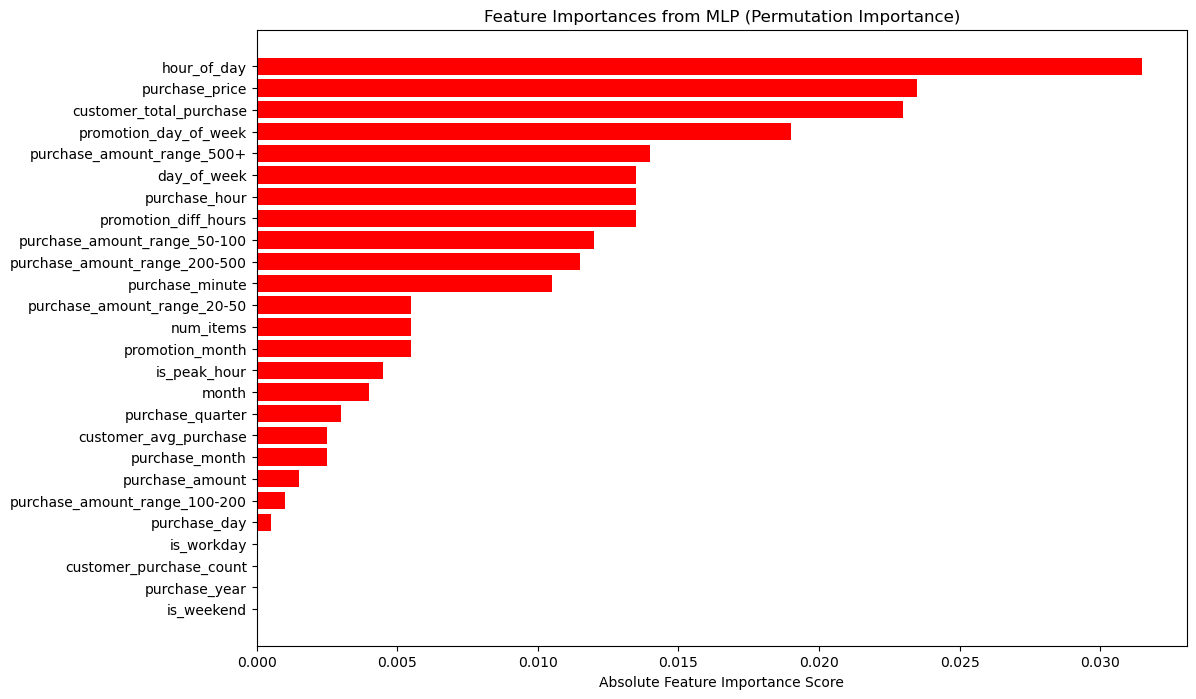

In [40]:
# Compute Feature Importance using Permutation Importance
perm_importance = permutation_importance(mlp_model, x_val, y_val, scoring='accuracy', n_repeats=10, random_state=42)
feature_importances = np.abs(perm_importance.importances_mean)  # Taking absolute values
features = x_train.columns

# Create DataFrame for Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print Feature Importance Ranking
print("\nFeature Importances (MLP - Permutation Importance):")
print(importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='red')
plt.gca().invert_yaxis()  
plt.xlabel('Absolute Feature Importance Score')
plt.title('Feature Importances from MLP (Permutation Importance)')
plt.show()

/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Nimbus/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/e


🔹 MLP Accuracy: 0.515

🔹 Classification Report (MLP):
               precision    recall  f1-score   support

           0       0.51      0.61      0.55        99
           1       0.52      0.43      0.47       101

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200


🔹 Confusion Matrix (MLP):
 [[60 39]
 [58 43]]


/var/folders/k3/7d8xvp51451d_3lkv9yq12g80000gn/T/ipykernel_92375/274159973.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="coolwarm")


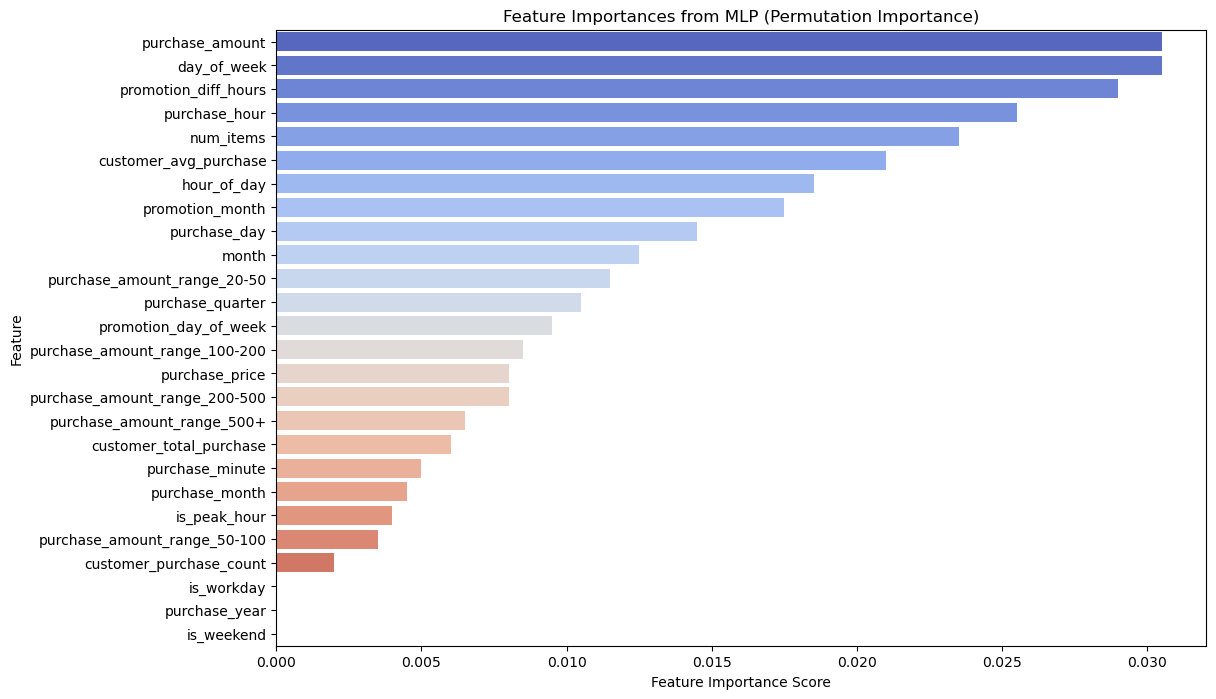

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Normalize data (Feature Scaling)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

#  Hyperparameter tuning with GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

grid_search_mlp = GridSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search_mlp.fit(x_train_scaled, y_train)

#  Train MLP with best parameters and early stopping
best_mlp = MLPClassifier(
    hidden_layer_sizes=grid_search_mlp.best_params_['hidden_layer_sizes'],
    activation=grid_search_mlp.best_params_['activation'],
    alpha=grid_search_mlp.best_params_['alpha'],
    learning_rate_init=grid_search_mlp.best_params_['learning_rate_init'],
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)
best_mlp.fit(x_train_scaled, y_train)

# Compute feature importance using Permutation Importance
perm_importance = permutation_importance(best_mlp, x_val_scaled, y_val, scoring='accuracy', n_repeats=10, random_state=42)
feature_importances = np.abs(perm_importance.importances_mean)
features = x_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

#  Make predictions
y_pred_mlp = best_mlp.predict(x_val_scaled)

#  Evaluate performance
print("\n🔹 MLP Accuracy:", accuracy_score(y_val, y_pred_mlp))
print("\n🔹 Classification Report (MLP):\n", classification_report(y_val, y_pred_mlp))
print("\n🔹 Confusion Matrix (MLP):\n", confusion_matrix(y_val, y_pred_mlp))

#  Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="coolwarm")
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances from MLP (Permutation Importance)')
plt.show()


In [42]:
# Accuracies table
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'KNN', 'MLP']
accuracies = [
    accuracy_score(y_val, y_pred),
    accuracy_score(y_val, y_pred_rf),
    accuracy_score(y_val, y_pred_xgb),
    accuracy_score(y_val, y_pred_svm),
    accuracy_score(y_val, y_pred_knn),
    accuracy_score(y_val, y_pred_mlp)
]

# print
for model, acc in zip(models, accuracies):
    print(f"{model}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.5050
Random Forest: Accuracy = 0.5100
XGBoost: Accuracy = 0.5450
SVM: Accuracy = 0.5400
KNN: Accuracy = 0.5400
MLP: Accuracy = 0.5150
